In [1]:
import sys

sys.path.append("..")

In [2]:
import rasterio
from rasterio import plot

import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from textwrap import fill
from functools import partial

from tests.raster_processing.clip_test import raster_path as SMALL_RASTER_PATH
from tests.raster_processing.clip_test import polygon_path as polygon_path

from eis_toolkit.vector_processing.distance_computation import distance_computation
from eis_toolkit.vector_processing.proximity_computation import proximity_computation

In [3]:
def _plot_distance_matrix(ax, distance_array, title, transform):
    plot.show(distance_array, transform=transform, ax=ax,cmap='gray')
    ax.set_title(fill(title, width=30))
    norm = plt.Normalize(vmax=np.nanmax(distance_array), vmin=np.nanmin(distance_array))
    cmap = "gray"
    plt.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap),ax=ax)


def _plot_example(path_polygon,path_raster,maximum_distance):
    fig, axes = plt.subplots(1,3, figsize=(15,10))

    gdf = gpd.read_file(path_polygon)
    with rasterio.open(path_raster) as test_raster:
        raster_profile = test_raster.profile
        transform = test_raster.transform

    gdf = gpd.read_file(polygon_path)
    _plot_image_with_transform = partial(_plot_distance_matrix,transform=transform)

    with rasterio.open(SMALL_RASTER_PATH) as test_raster:
        raster_profile = test_raster.profile
        transform = test_raster.transform

    distance_matrix=distance_computation(gdf,raster_profile) #Distance matrix from the distance computation function
    _plot_image_with_transform(ax=axes[0], distance_array=distance_matrix,title="Distance Computation") 

    distance_matrix=distance_computation(gdf,raster_profile, maximum_distance) #Distance matrix from the distance computation function with maximum distance
    _plot_image_with_transform(ax=axes[1], distance_array=distance_matrix,title="Distance Computation with maximum distance = 25")

    output_mat2 = proximity_computation(gdf,raster_profile, maximum_distance, 'linear', (1,0)) #Output form the new proximity tool with maximum distance = 25
    _plot_image_with_transform(ax=axes[2], distance_array=output_mat2,title="Inversion from Proximity_computation with maximum distance = 25")    

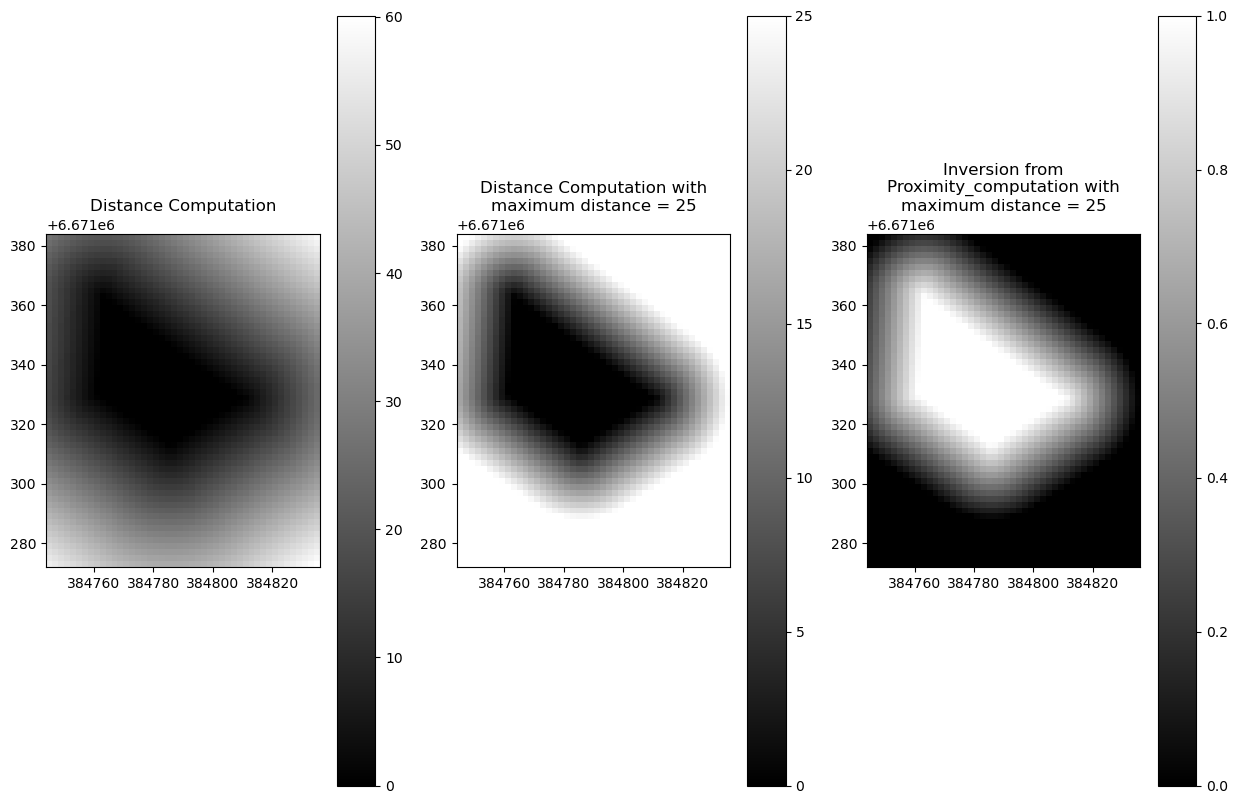

In [4]:
_plot_example(polygon_path,SMALL_RASTER_PATH,25)